In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Explanation of data
* We have a very small dataset of 918 rows and 12 columns 
* 0= Normal , 1 = heart Disease
* Chest Pain Type- 
1. Typical Angina (TA):This type of chest pain is considered typical or characteristic of angina pectoris, a condition caused by reduced blood flow to the heart muscle.
2. Atypical Angina (ATA):Atypical angina refers to chest pain that does not fit the typical pattern of angina but still may be related to heart issues. The discomfort may be sharp, burning, or stabbing.
3. Non-Anginal Pain (NAP): Non-anginal pain is chest discomfort that is not related to angina or heart-related issues. It may be caused by other conditions such as musculoskeletal problems, gastrointestinal issues, or anxiety.
4. Asymptomatic (ASY): Asymptomatic means the absence of symptoms. In the context of chest pain types, it indicates that the individual does not experience chest pain or discomfort.

* Resting BP- blood pressure at resting position [mm Hg]

* FastingBS- "Fasting BS" refers to the measurement of blood glucose (sugar) levels after a period of fasting. It is commonly used to assess and diagnose diabetes or to monitor blood sugar control in individuals with diabetes. The term "BS" stands for "blood sugar. [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* Maximum Heart Rate (MaxHR):is the highest heart rate an individual can achieve during intense physical exertion.
* "Exercise angina" refers to angina pectoris that is triggered or worsened by physical exertion or exercise.
* Oldpeak :"ST depression induced by exercise relative to rest. [Up: upsloping, Flat: flat, Down: downsloping]
* ST slope :direction or inclination of the ST segment on an electrocardiogram (ECG or EKG).


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.duplicated().sum()

0

**Note-** Our Data is quite clean and there are no duplicate values are present and no null values are there 

# Outlier Detection

Outlier detection, also known as anomaly detection, is a process of identifying observations or data points that deviate significantly from the majority of the data in a dataset. These observations are called outliers, anomalies, or exceptions, and they may indicate errors in the data, interesting patterns, or rare events.The presence of outliers can have a significant impact on statistical analysis and machine learning models. Outliers may arise due to errors in data collection, measurement noise, or they could represent genuine but rare events that are of particular interest

##### Step 1: Check if there's any outlier present or not 
To do that we will use boxplot . Using a boxplot is a quick and effective way to visually identify the presence of outliers in a dataset. 

Text(0.5, 1.0, 'Age')

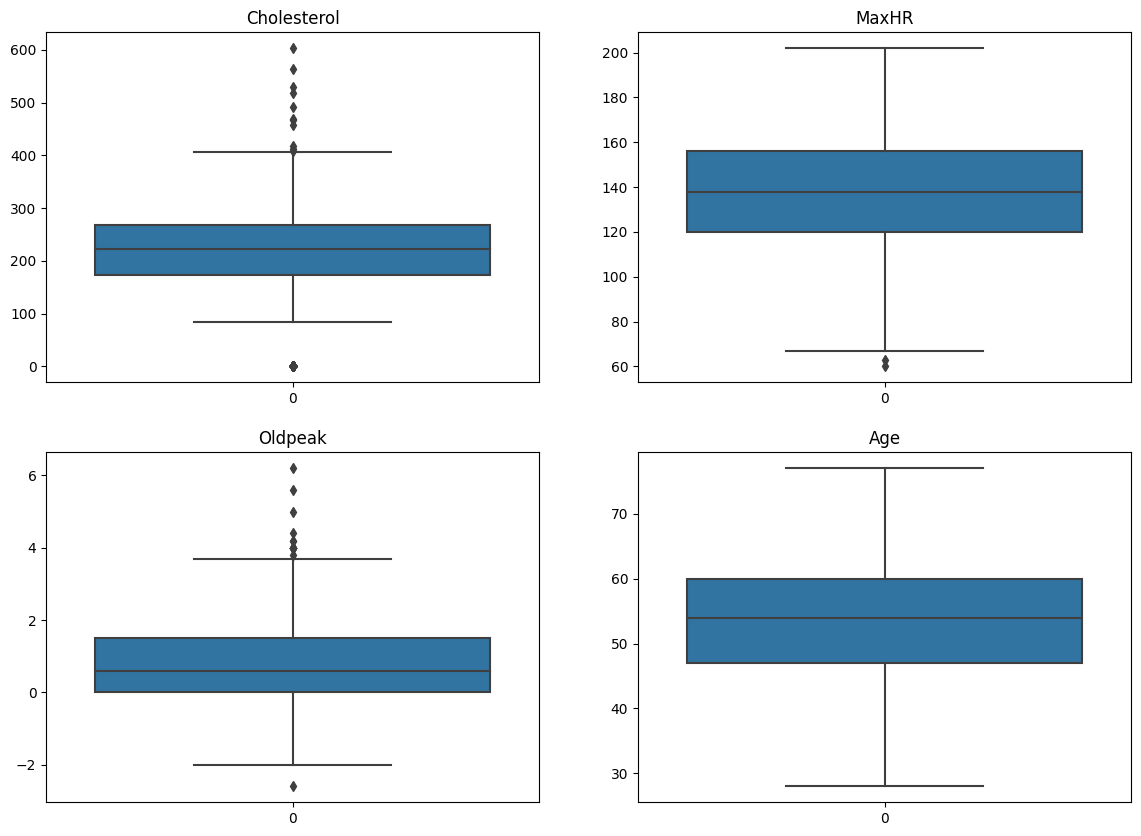

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
sns.boxplot(df['Cholesterol'],ax=axes[0,0])
axes[0,0].set_title('Cholesterol')

sns.boxplot(df['MaxHR'],ax=axes[0,1])
axes[0,1].set_title('MaxHR')

sns.boxplot(df['Oldpeak'],ax=axes[1,0])
axes[1,0].set_title('Oldpeak')

sns.boxplot(df['Age'],ax=axes[1,1])
axes[1,1].set_title('Age')

So from above we can see that there are many outliers present in Cholestrol and OldPeak.
Since we have very small dataset we can't remove the rows so we will apply capping

**Capping-** also known as "clipping" or "winsorizing," is a technique used in outlier handling to limit extreme values in a dataset. It involves setting a predefined threshold beyond which values are considered outliers, and these extreme values are then replaced or "capped" at that threshold. The goal is to mitigate the impact of outliers on statistical analysis without entirely removing the data points.

In [10]:
#we will define the lower and upper limit of these features and replace the extreme value with these
cholesterol_upper_limit=df['Cholesterol'].mean()+3*df['Cholesterol'].std()
cholesterol_lower_limit=0
OldPeak_upper_limit=df['Oldpeak'].mean()+3*df['Oldpeak'].std()
OldPeak_lower_limit=df['Oldpeak'].mean()-3*df['Oldpeak'].std()

In [11]:
df[df['Cholesterol']>cholesterol_upper_limit] 


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [12]:
df[df['Cholesterol']<cholesterol_lower_limit]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [13]:
df[df['Oldpeak']<OldPeak_lower_limit]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1


In [14]:
df[df['Oldpeak']>OldPeak_upper_limit]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


⬆️ All these are outliers 

In [15]:
# This function will replace the outlier values with limiting values
def Capping(df,column_name,upper_limit,lower_limit):
    df[column_name]=np.where(df[column_name]>upper_limit,upper_limit,df[column_name])
    df[column_name]=np.where(df[column_name]<lower_limit,lower_limit,df[column_name])

In [16]:
Capping(df,'Oldpeak',OldPeak_upper_limit,OldPeak_lower_limit)
Capping(df,'Cholesterol',cholesterol_upper_limit,cholesterol_lower_limit)


In [17]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.674135,0.233115,136.809368,0.882146,0.553377
std,9.432617,18.514154,108.970903,0.423046,25.460334,1.044799,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.312347,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,526.951998,1.000000,202.000000,4.087074,1.000000


The application of capping has effectively reduced the maximum values of Cholesterol to 526 and OldPeak to 4.08, compared to their initial values of 603 and 6.2, respectively. 
So we have succesfully handled the outliers 

SO we have successfully handled the outliers

# EDA
EDA stands for Exploratory Data Analysis. It is a critical phase in the data analysis process, particularly in the context of machine learning. The primary goal of EDA is to summarize the main characteristics of a dataset, often employing statistical and graphical methods. In simple words we perform EDA to understand the data in more depth 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Age scatter plot')

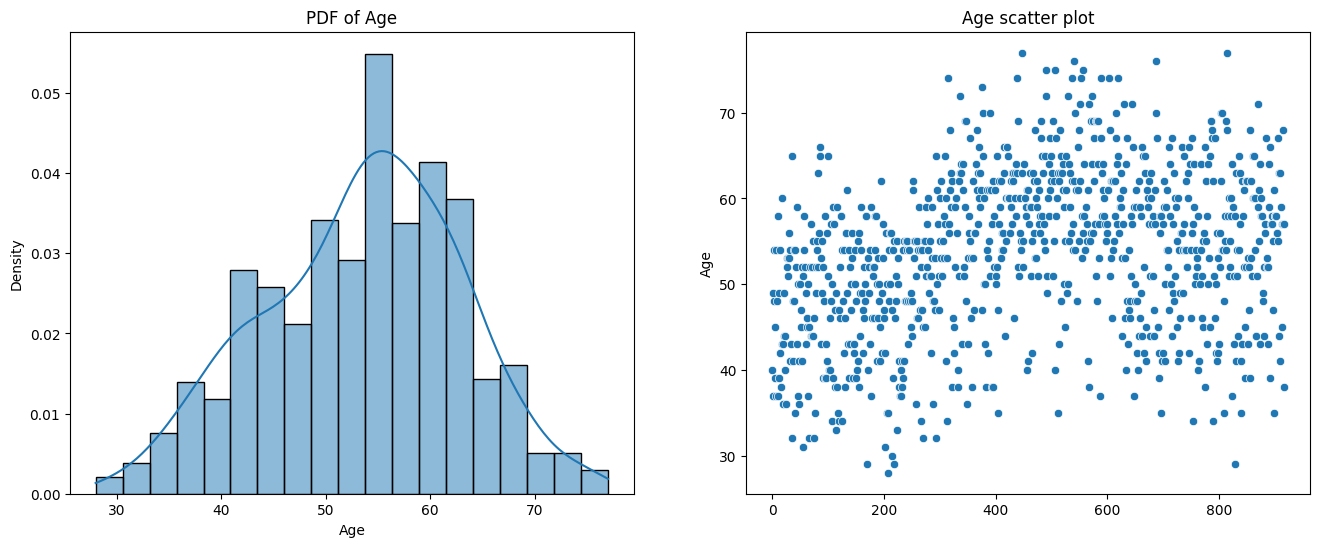

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))   # this is to create 2*2 grid 

#density plot for Age column 
sns.histplot(df['Age'],kde=True,stat="density",ax=axes[0])
axes[0].set_title('PDF of Age')

sns.scatterplot(df["Age"],ax=axes[1])
axes[1].set_title('Age scatter plot')

**Obseravtions**: Age column is almost normally distributed 

Text(0.5, 1.0, 'comapriosn between sex and Disease')

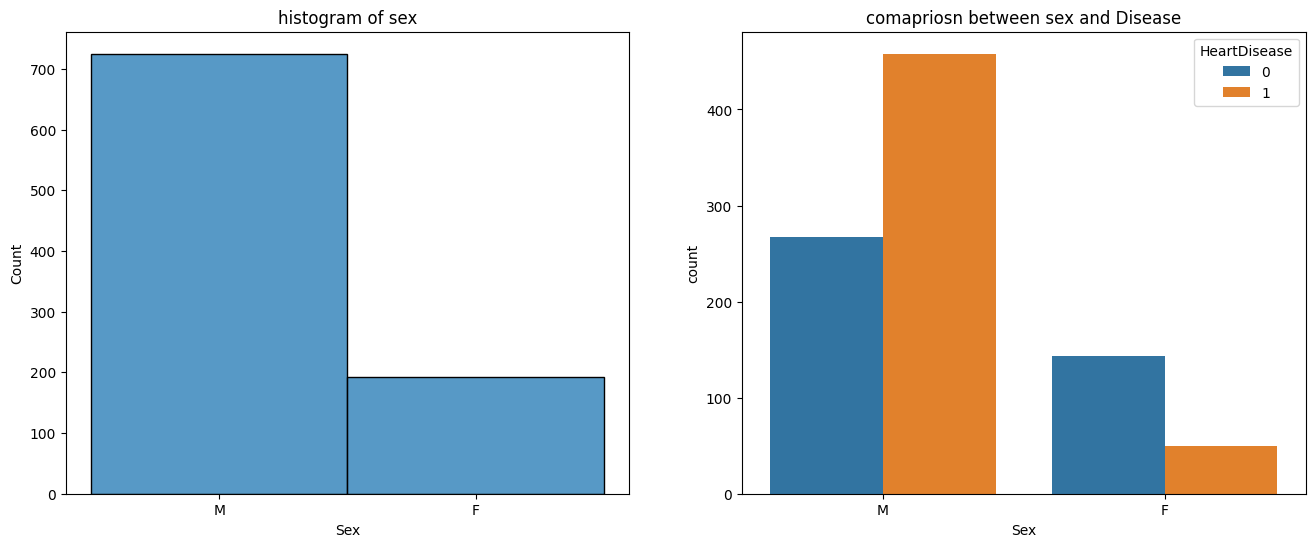

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.histplot(df['Sex'],ax=axes[0])
axes[0].set_title('histogram of sex')

sns.countplot(df,x=df['Sex'],hue='HeartDisease')
axes[1].set_title('comapriosn between sex and Disease')

**Obervations-**
1. Our data contains more observations for males than females.
2. Males exhibit a higher prevalence of heart disease compared to females.


Text(0.5, 1.0, 'ST Slope and HeartDisease ')

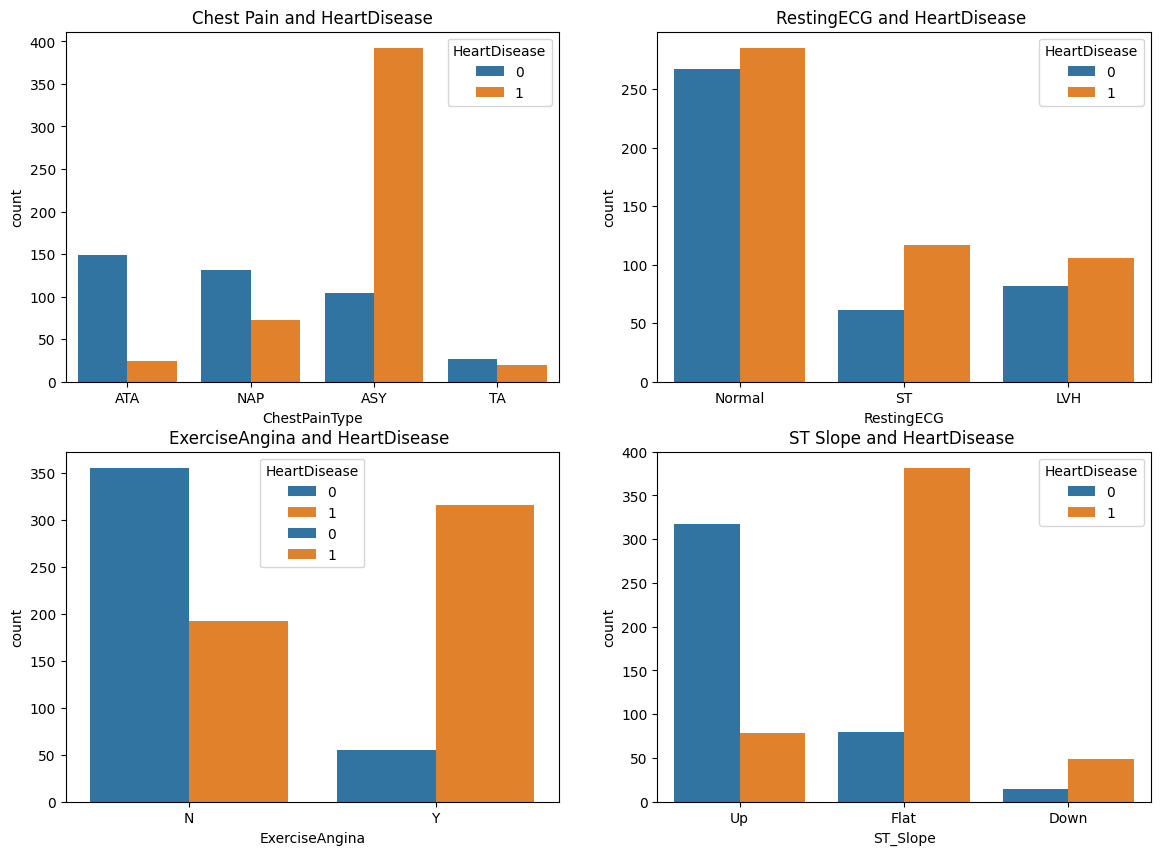

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

sns.countplot(df,x=df['ChestPainType'],hue='HeartDisease',ax=axes[0,0])
axes[0,0].set_title('Chest Pain and HeartDisease')

sns.countplot(df,x=df['RestingECG'],hue='HeartDisease',ax=axes[0,1])
axes[0,1].set_title('RestingECG and HeartDisease ')


sns.countplot(df,x=df['ExerciseAngina'],hue='HeartDisease',ax=axes[1,0])
axes[1,0].set_title('ExerciseAngina and HeartDisease ')


sns.countplot(df,x=df['ExerciseAngina'],hue='HeartDisease',ax=axes[1,0])
axes[1,0].set_title('ExerciseAngina and HeartDisease ')

sns.countplot(df,x=df['ST_Slope'],hue='HeartDisease',ax=axes[1,1])
axes[1,1].set_title('ST Slope and HeartDisease ')

**obervations:**
1. ASY (Asymptomatic), indicating the absence of chest pain symptoms, is the leading cause of heart disease. This is concerning as individuals with no symptoms may neglect necessary precautions.
2. People who have exercise Angina have more chances of heart Disease
3. People with Flat ST Slope have high chances of Heart disease

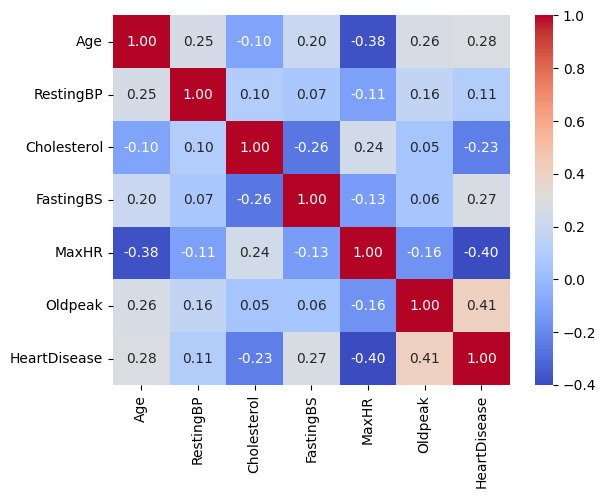

In [22]:
sns.heatmap(df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


### Observations-
1. Our data contains more observations for males than females.
2. Males exhibit a higher prevalence of heart disease compared to females.

3. ASY (Asymptomatic), indicating the absence of chest pain symptoms, is the leading cause of heart disease. This is concerning as individuals with no symptoms may neglect necessary precautions.

4. Individuals experiencing exercise-induced Angina are more likely to have heart disease.

5. Those with a Flat ST Slope demonstrate an elevated risk of heart disease.

6. Cholesterol and MaxHr are negatively correlated with HeartDisease

# Train test Split

In [23]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=42)


In [25]:
x_test.shape

(184, 11)

In [26]:
x_train.shape

(734, 11)

# Building Pipeline
**Machine learning pipelines** are a set of processes and workflows that facilitate the end-to-end development and deployment of machine learning models. These pipelines help streamline and automate various steps involved in the machine learning lifecycle, from data preparation and feature engineering to model training, evaluation, and deployment


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# OHE
**OHE**-One-hot encoding is a technique used in machine learning to represent categorical variables as binary vectors. In simpler terms, it's a way to turn categories or labels into numbers that can be used as input to train a machine learning model.

**Column transformers** are used to apply multiple transformation together 

In [28]:
transformer1= ColumnTransformer(
    transformers=[
        ('tnf1', OneHotEncoder(), ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
    ],
    remainder='passthrough'
)



In [29]:
transformer2 = ColumnTransformer(
    transformers=[
        ('scale', MinMaxScaler(), [0,3,4,7]),
    ],
    remainder='passthrough'
)


In [30]:
pipe=Pipeline([
    ('trf1',transformer1),
    ('trf2',transformer2)
])

In [31]:
x_train_processed=pipe.fit_transform(x_train)
x_test_processed=pipe.transform(x_test)

In [32]:
x_train_processed.shape

(734, 20)

In [33]:
ohe_transformer = pipe.named_steps['trf1']
ohe_feature_names = ohe_transformer.get_feature_names_out()
print(ohe_feature_names)

['tnf1__Sex_F' 'tnf1__Sex_M' 'tnf1__ChestPainType_ASY'
 'tnf1__ChestPainType_ATA' 'tnf1__ChestPainType_NAP'
 'tnf1__ChestPainType_TA' 'tnf1__RestingECG_LVH' 'tnf1__RestingECG_Normal'
 'tnf1__RestingECG_ST' 'tnf1__ExerciseAngina_N' 'tnf1__ExerciseAngina_Y'
 'tnf1__ST_Slope_Down' 'tnf1__ST_Slope_Flat' 'tnf1__ST_Slope_Up'
 'remainder__Age' 'remainder__RestingBP' 'remainder__Cholesterol'
 'remainder__FastingBS' 'remainder__MaxHR' 'remainder__Oldpeak']


⬆️ these are new fetures after one hot encoding and feature scalling

# Model Building

In [34]:
# you have to provide object of your machine learning classifier and this function will return the accuracy , precsion and recall of the model
def Tester(model):
    model.fit(x_train_processed,y_train)
    pred=model.predict(x_test_processed)
    a=accuracy_score(y_test,pred)
    p=precision_score(y_test,pred)
    r=recall_score(y_test,pred)
    d={'model_name': str(model),'training_accuracy':a,'Training_precision': p,'Trainig_recall': r}
    return d

In [35]:
# importing multiple algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier ,VotingClassifier,AdaBoostClassifier,StackingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,recall_score


In [36]:
# create objects of all the models with suitable hyper parameters which we got by using grid search cv
logistic=LogisticRegression(max_iter=100,penalty='l2',solver= 'lbfgs',tol= 0.0001)
DT=DecisionTreeClassifier(criterion='log_loss',max_depth=5,min_samples_leaf=2,min_samples_split=2,splitter='random')
randomforest=RandomForestClassifier(n_estimators=15,min_samples_split=2,min_samples_leaf=3,max_features='sqrt',max_depth=None,criterion='entropy',bootstrap=False)
svcclf=SVC()
GNB=GaussianNB()
BNB=BernoulliNB()
votingclf=VotingClassifier(estimators=[('logistic',logistic),('DT',DT),('svcclf',svcclf),('GNB',GNB)],voting='hard')
adaboostclf=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=20)
stackclf=StackingClassifier(estimators=[('logistic',logistic),('DT',DT),('svcclf',svcclf),('GNB',GNB)],stack_method='predict')
gradientboostingclf=GradientBoostingClassifier(criterion='squared_error',learning_rate= 0.1, loss='exponential')



In [37]:
outputs={
    'a':Tester(logistic),
    'b':Tester(DT),
    'c':Tester(randomforest),
    'd':Tester(svcclf),
    'e':Tester(GNB),
    'g':Tester(BNB),
    'h':Tester(votingclf),
    'i':Tester(adaboostclf),
    'j':Tester(stackclf),
    'k':Tester(gradientboostingclf),
}

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [38]:
res=pd.DataFrame(outputs.values())
res

,model_name,training_accuracy,Training_precision,Trainig_recall
0,LogisticRegression(),0.853261,0.900000,0.841121
1,"DecisionTreeClassifier(criterion='log_loss', m...",0.864130,0.901961,0.859813
2,"RandomForestClassifier(bootstrap=False, criter...",0.880435,0.904762,0.887850
3,SVC(),0.684783,0.757895,0.672897
4,GaussianNB(),0.869565,0.927835,0.841121
5,BernoulliNB(),0.858696,0.909091,0.841121
6,"VotingClassifier(estimators=[('logistic', Logi...",0.880435,0.938144,0.850467
7,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.875000,0.911765,0.869159
8,"StackingClassifier(estimators=[('logistic', Lo...",0.880435,0.904762,0.887850
9,GradientBoostingClassifier(criterion='squared_...,0.891304,0.914286,0.897196


⬆️ here is the performance of all the models

Now we'll see  how i found out optimal parameters for the model.

## **Grid Search CV**,:
GridSearchCV, is a technique used for hyperparameter tuning in machine learning. It's a method for systematically working through multiple combinations of hyperparameter values to find the best parameters for a model.

In [39]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [40]:
# applying grid search cv for logistic regression class
para_grid={
    'penalty':['l1','l2'],
    'tol':[0.0001,0.0005,0.001],
    'solver':['lbfgs','newton-cholesky'],
    'max_iter':[100,150,200,300]
    
}
logi_reg_gridcv=GridSearchCV(estimator=logistic,
                           param_grid=para_grid,
                           cv=5)
logi_reg_gridcv.fit(x_train_processed,y_train)
logi_reg_gridcv.best_params_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}

⬆️ these are the optimal hyper parameteres for logistic regression 

In [41]:
# applying grid search cv for Decision tree class
DT_gridcv=GridSearchCV(estimator=DT,
    param_grid={'criterion':['gini','entropy','log_loss'],
               'splitter':['best','random'],
               'max_depth':[None,1,5,10,20,25],
               'min_samples_split':[2,5,8,10],
               'min_samples_leaf':[1,2,3,4,5]},
    cv=5)
DT_gridcv.fit(x_train_processed,y_train)
DT_gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

In [42]:
# applying random search cv for random forest class
from sklearn.model_selection import RandomizedSearchCV
randomforest_cv=RandomizedSearchCV(estimator=randomforest,
    param_distributions={'n_estimators':[10,15,20,25],
               'criterion':['gini','entropy','log_loss'],
                'max_features':['sqrt','log2',None],
               'max_depth':[None,1,3],
               'min_samples_split':[2,3,5],
               'min_samples_leaf':[1,2,3],
               'bootstrap':[True,False]},
    cv=5)
randomforest_cv.fit(x_train_processed,y_train)
randomforest_cv.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [43]:
# applying grid search cv for voting classifier class
Voting_gridcv=GridSearchCV(estimator=votingclf,
    param_grid={'voting':['hard','soft']},
    cv=5)
Voting_gridcv.fit(x_train_processed,y_train)
Voting_gridcv.best_params_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'voting': 'hard'}

In [44]:
# applying grid search cv for ADABoost
ADAboost_gridcv=GridSearchCV(estimator=adaboostclf,
    param_grid={'n_estimators':[1,5,10,20],
               'learning_rate':[0.001,0.01,0.1,0.5,1],
               'algorithm':['SAMME','SAMME.R']},
    cv=5)
ADAboost_gridcv.fit(x_train_processed,y_train)
ADAboost_gridcv.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 20}

In [45]:
# applying grid search cv for stacking classifier
stackclf_gridcv=GridSearchCV(estimator=stackclf,
    param_grid={'stack_method':['auto','predict_proba','decision_function','predict']},
    cv=5)
stackclf_gridcv.fit(x_train_processed,y_train)
stackclf_gridcv.best_params_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'stack_method': 'auto'}

In [46]:
# applying grid search cv for Gradient Boosting 
gradientboostingclf_gridcv=GridSearchCV(estimator=gradientboostingclf,
    param_grid={'loss':['log_loss','exponential']
               ,'learning_rate':[0.0001,0.001,0.01,0.1],
               'criterion':['friedman_mse','squared_error']
               },
    cv=5)
gradientboostingclf_gridcv.fit(x_train_processed,y_train)
gradientboostingclf_gridcv.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss'}

Now Lets test the algorithms

# Performance measurement on all the models

In [47]:
# this function will return accuracy of the model on test data set 
def performance_checker(model,x_test,y_test):
    y_prediction=model.predict(x_test)
    accuracy = accuracy_score(y_test, y_prediction)
    return accuracy

In [48]:
models=[logistic,DT,randomforest,svcclf,GNB,BNB,votingclf,adaboostclf,stackclf,gradientboostingclf]

In [49]:
res['Tested_accuracy']=None
z=0
for i in models:
    acc=performance_checker(i,x_test_processed,y_test)
    res.loc[z,'Tested_accuracy']=acc
    z+=1

In [50]:
res

,model_name,training_accuracy,Training_precision,Trainig_recall,Tested_accuracy
0,LogisticRegression(),0.853261,0.900000,0.841121,0.853261
1,"DecisionTreeClassifier(criterion='log_loss', m...",0.864130,0.901961,0.859813,0.86413
2,"RandomForestClassifier(bootstrap=False, criter...",0.880435,0.904762,0.887850,0.880435
3,SVC(),0.684783,0.757895,0.672897,0.684783
4,GaussianNB(),0.869565,0.927835,0.841121,0.869565
5,BernoulliNB(),0.858696,0.909091,0.841121,0.858696
6,"VotingClassifier(estimators=[('logistic', Logi...",0.880435,0.938144,0.850467,0.880435
7,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.875000,0.911765,0.869159,0.875
8,"StackingClassifier(estimators=[('logistic', Lo...",0.880435,0.904762,0.887850,0.880435
9,GradientBoostingClassifier(criterion='squared_...,0.891304,0.914286,0.897196,0.891304


#  Conclusion 
From the above dataframe we can see that Gradient boosting classifier is giving us the most optimal performance in terms of accuracy , precision and recall.

* **classifier**: Gradient Boosting Classifier 
* **accuracy**:89.13%
* **precision**:91.42%
* **racall:**89.72%
* **testing_accuracy** : 89.13%
